In [8]:
import numpy as np
import pandas as pd 

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
%matplotlib inline
import seaborn as sns
plt.style.use('seaborn-talk')
plt.style.use('bmh')
plt.rcParams['font.weight'] = 'medium'
#plt.rcParams['figure.figsize'] = 10,7
blue, green, red, purple, gold, teal = sns.color_palette('colorblind', 6)

import os
print(f"Current dir: {os.getcwd()}")
os.chdir('..')
print(f"Current dir: {os.getcwd()}")

Current dir: /home/fernando.delacalle/flcalle@ing.uc3m.es/Documentos/WORK/financial/adv_financial_ml_book
Current dir: /home/fernando.delacalle/flcalle@ing.uc3m.es/Documentos/WORK/financial


# Chapter 8: Feature Importance
## Code Snippets

In [9]:
from src.snippets.ch8 import getTestData

My own SNIPPETS 8.8, 8.9 and 8.10

In [10]:
n_features=40 
n_informative=10
n_redundant=10
n_estimators=1000
n_samples=10000
cv = 10

trnsX,cont=getTestData(n_features,n_informative,n_redundant,n_samples)

In [14]:
cont

,bin,w,t1
1980-05-02 10:31:58.338554,0,0.0001,1980-05-02 10:31:58.338554
1980-05-05 10:31:58.338554,0,0.0001,1980-05-05 10:31:58.338554
1980-05-06 10:31:58.338554,0,0.0001,1980-05-06 10:31:58.338554
1980-05-07 10:31:58.338554,0,0.0001,1980-05-07 10:31:58.338554
1980-05-08 10:31:58.338554,0,0.0001,1980-05-08 10:31:58.338554
1980-05-09 10:31:58.338554,0,0.0001,1980-05-09 10:31:58.338554
1980-05-12 10:31:58.338554,0,0.0001,1980-05-12 10:31:58.338554
1980-05-13 10:31:58.338554,0,0.0001,1980-05-13 10:31:58.338554
1980-05-14 10:31:58.338554,0,0.0001,1980-05-14 10:31:58.338554
1980-05-15 10:31:58.338554,1,0.0001,1980-05-15 10:31:58.338554


In [12]:
cont.shape

(10000, 3)

In [4]:
from src.snippets.ch8 import featImpMDI
from src.snippets.ch8 import featImpMDA
from src.snippets.ch8 import auxFeatImpSFI

from src.snippets.ch7 import PurgedKFold
from src.snippets.ch7 import cvScore

In [5]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

def featImportance_no_para(trnsX, cont, n_estimators=1000, cv=10, max_samples=1., numThreads=24,
                   pctEmbargo=0, scoring='accuracy', method='SFI', minWLeaf=0., **kargs):

    n_jobs = (-1 if numThreads > 1 else 1)
    #1) prepare classifier,cv. max_features=1, to prevent masking
    clf = DecisionTreeClassifier(criterion='entropy', max_features=1,
                                 class_weight='balanced', min_weight_fraction_leaf=minWLeaf)
    clf = BaggingClassifier(base_estimator=clf, n_estimators=n_estimators,
                            max_features=1., max_samples=max_samples,
                            oob_score=True, n_jobs=n_jobs)
    fit = clf.fit(X=trnsX, y=cont['bin'], sample_weight=cont['w'].values)
    oob = fit.oob_score_
    
    print(f'oob: {oob} , {clf.oob_score_}')
    print(f"score: {clf.score(X=trnsX, y=cont['bin'])}")
    
    if method == 'MDI':
        imp = featImpMDI(fit, featNames=trnsX.columns)
        oos = cvScore(clf, X=trnsX, y=cont['bin'], cv=cv, sample_weight=cont['w'],
                      t1=cont['t1'], pctEmbargo=pctEmbargo, scoring=scoring)
        print(f'fold acc: {oos}')
        oos = oos.mean()
    elif method == 'MDA':
        imp, oos = featImpMDA(clf, X=trnsX, y=cont['bin'], cv=cv, sample_weight=cont['w'],
                              t1=cont['t1'], pctEmbargo=pctEmbargo, scoring=scoring)
    elif method == 'SFI':
        
        cvGen = PurgedKFold(n = trnsX.shape[0],
                            n_folds=cv, 
                            t1=cont['t1'], 
                            pctEmbargo=pctEmbargo)
        
        oos = cvScore(clf, 
                      X=trnsX, 
                      y=cont['bin'], 
                      sample_weight=cont['w'], 
                      scoring=scoring, 
                      cvGen=cvGen).mean()
        
        clf.n_jobs = 1  # paralellize auxFeatImpSFI rather than clf
        imp = auxFeatImpSFI(trnsX.columns, clf=clf, trnsX=trnsX, cont=cont, scoring=scoring, cvGen=cvGen) 
    return imp, oob, oos

/datos/virtual_env/env_financial/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [6]:
def plotFeatImportance(imp, oob, oos, method, tag=0, simNum=0, **kargs):
    '''
    SNIPPET 8.10 FEATURE IMPORTANCE PLOTTING FUNCTION
    plot mean imp bars with std
    '''
    plt.figure(figsize=(10, imp.shape[0]/5.))
    imp = imp.sort_values('mean', ascending=True)
    ax = imp['mean'].plot(kind='barh', color='b',
                          alpha=.25, xerr=imp['std'],
                          error_kw={'ecolor': 'r'})
    if method == 'MDI':
        plt.xlim([0, imp.sum(axis=1).max()])
        plt.axvline(1./imp.shape[0], linewidth=1,
                    color='r', linestyle='dotted')
    ax.get_yaxis().set_visible(False)
    for i, j in zip(ax.patches, imp.index):
        ax.text(i.get_width()/2,
                i.get_y()+i.get_height()/2, j, ha='center', va='center',
                color='black')
    plt.title(f'tag={tag} | simNum={simNum} | oob={oob:.{2}} | oos={oos:.{2}}')

oob: 0.9264 , 0.9264
score: 1.0
Fold: 0
Fold: 1
Fold: 2
Fold: 3
Fold: 4
Fold: 5
Fold: 6
Fold: 7
Fold: 8
Fold: 9
fold acc: [0.829 0.805 0.918 0.75  0.741 0.827 0.807 0.915 0.866 0.864]


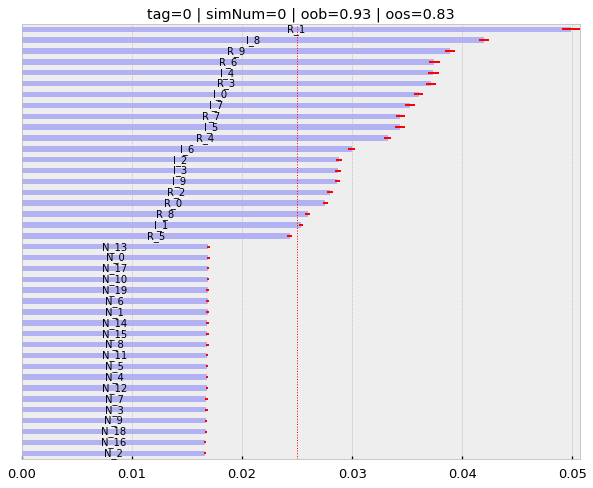

In [7]:
method = 'MDI'
imp,oob,oos = featImportance_no_para(trnsX=trnsX,cont=cont, method = method)
plotFeatImportance(imp=imp,oob=oob,oos=oos, method = method)

oob: 0.9262 , 0.9262
score: 1.0


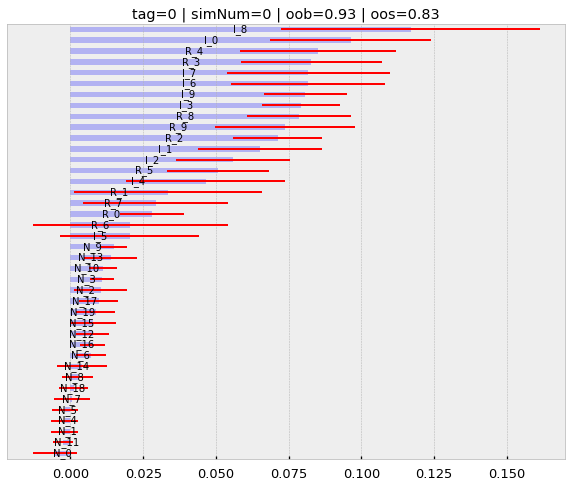

In [8]:
method = 'MDA'
imp,oob,oos = featImportance_no_para(trnsX=trnsX,cont=cont, method = method)
plotFeatImportance(imp=imp,oob=oob,oos=oos, method = method)

oob: 0.9288 , 0.9288
score: 1.0
Fold: 0
Fold: 1
Fold: 2
Fold: 3
Fold: 4
Fold: 5
Fold: 6
Fold: 7
Fold: 8
Fold: 9
Feature: I_0
Fold: 0
Fold: 1
Fold: 2
Fold: 3
Fold: 4
Fold: 5
Fold: 6
Fold: 7
Fold: 8
Fold: 9
Feature: I_1
Fold: 0
Fold: 1
Fold: 2
Fold: 3
Fold: 4
Fold: 5
Fold: 6
Fold: 7
Fold: 8
Fold: 9
Feature: I_2
Fold: 0
Fold: 1
Fold: 2
Fold: 3
Fold: 4
Fold: 5
Fold: 6
Fold: 7
Fold: 8
Fold: 9
Feature: I_3
Fold: 0
Fold: 1
Fold: 2
Fold: 3
Fold: 4
Fold: 5
Fold: 6
Fold: 7
Fold: 8
Fold: 9
Feature: I_4
Fold: 0
Fold: 1
Fold: 2
Fold: 3
Fold: 4
Fold: 5
Fold: 6
Fold: 7
Fold: 8
Fold: 9
Feature: I_5
Fold: 0
Fold: 1
Fold: 2
Fold: 3
Fold: 4
Fold: 5
Fold: 6
Fold: 7
Fold: 8
Fold: 9
Feature: I_6
Fold: 0
Fold: 1
Fold: 2
Fold: 3
Fold: 4
Fold: 5
Fold: 6
Fold: 7
Fold: 8
Fold: 9
Feature: I_7
Fold: 0
Fold: 1
Fold: 2
Fold: 3
Fold: 4
Fold: 5
Fold: 6
Fold: 7
Fold: 8
Fold: 9
Feature: I_8
Fold: 0
Fold: 1
Fold: 2
Fold: 3
Fold: 4
Fold: 5
Fold: 6
Fold: 7
Fold: 8
Fold: 9
Feature: I_9
Fold: 0
Fold: 1
Fold: 2
Fold: 3
Fold: 

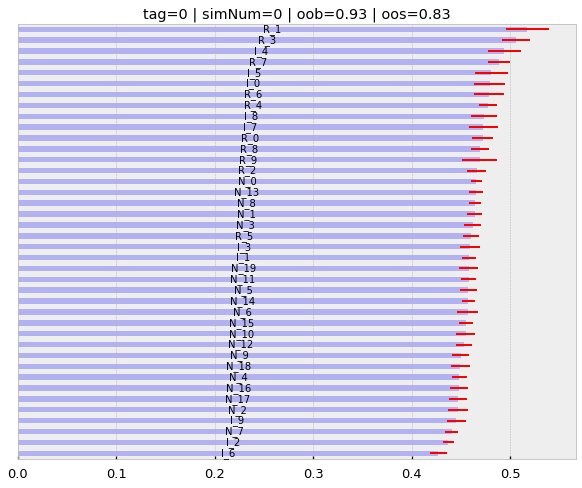

In [9]:
method = 'SFI'
imp,oob,oos = featImportance_no_para(trnsX=trnsX,cont=cont, method = method)

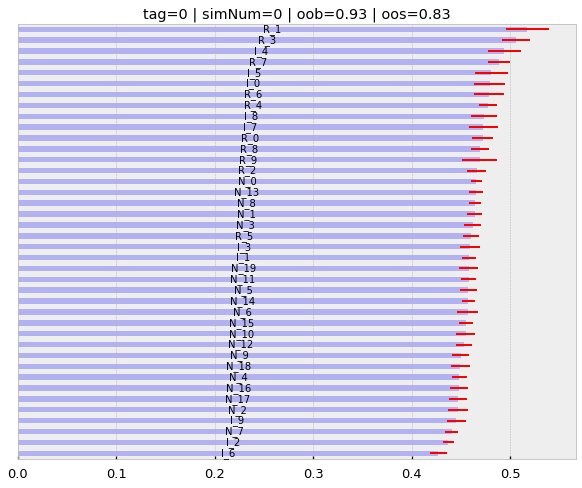

In [10]:
plotFeatImportance(imp=imp,oob=oob,oos=oos, method = method)